<a href="https://colab.research.google.com/github/ashwinidverma/llm-from-scratch/blob/main/LLM_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tokenization : character, word and subword

In [2]:
import re

text = "Hello, world.  This is a test."
result =  re.split(r'([,.]|\s)',text)
print(result)
result = [item for item in result if item.strip()]
result

['Hello', ',', '', ' ', 'world', '.', '', ' ', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


['Hello', ',', 'world', '.', 'This', 'is', 'a', 'test', '.']

In [3]:
with open("/content/the-verdict.txt",'r',encoding='utf-8') as f:
  raw_text = f.read()
print("total no of character:", len(raw_text))


total no of character: 20479


In [4]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [8]:
print(len(preprocessed))

4690


# Token IDs

In [9]:
all_words = sorted(set(preprocessed))
vocab_size= len(all_words)
#
print(vocab_size)

1130


In [10]:
vocab = {token:integer for integer,token in enumerate(all_words)}

In [11]:
vocab.items()
for i, item in enumerate(vocab.items()):
  print(item)
  if i >10:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)


In [12]:
class SimpleTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])
      #replace space before the specified punctuations
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [13]:
tokenizer = SimpleTokenizerV1(vocab)
text =""""It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [14]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [15]:
text= "Hello, do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

Special context tokens: To handal unknow tokens |unk| -> 783 (to assin ids for unknown tokens);
|endoftext| -> 784 (present at the end or begning of the text collected from different sources)

In [16]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}


In [17]:
 len(vocab.items())

1132

In [18]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [19]:
class SimpleTokenizerV2:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_tostr = {i:s for s,i in vocab.items()}
  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    preprocessed = [ item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids
  def decode(self,ids):
    text = " ".join([self.int_tostr[i] for i in ids])
    text = re.sub(r'\s+([,.:;?!"()\'])', r'\1',text)
    return text


In [20]:
tokenizer=SimpleTokenizerV2(vocab)
text1= "Hello, do you like tea?"
text2="In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1,text2))
print(text)


Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [21]:
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [22]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

#Byte Pair Encoding (BPE tokenizer)

It is a sub-word tokenization algorithm invented in 1994 for data compression.
"Most common pair of consecutive bytes of data is replaced with a byte that does ot occur in data"

Application in LLM
"BPE ensure that most comman words in the vocabulary are represented as a single token, while rare words are broken down into two or more subword tokens"

stopping criteria: token count or number of
iterations

In [23]:
!pip install tiktoken

In [24]:
import importlib
import tiktoken
importlib.metadata.version('tiktoken')

'0.9.0'

In [25]:
  tokenizer = tiktoken.get_encoding("gpt2")

In [26]:
text = ("Hello, do you like tea? <|endoftext|> In the sunlit terraces" "of someunknownPlace"
)

integers = tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271]


In [27]:
tokenizer.decode(integers)

'Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace'

In [28]:
 integers = tokenizer.encode("Akwirw ier")
 print(integers)
 strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


Create Input-Target pair using sliding window approach
(1) Implement data loader
(2) Fetche the input-output pairs

In [29]:
with open("/content/the-verdict.txt", "r", encoding = 'utf-8') as f:

  raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text)) #total number of tokes after applying BPE tokenizer

5145


In [30]:
enc_sample = enc_text[50:] #remove first 50 tokens from the database

In [31]:
 # to create input & output pairs define tow variable  x input tokens and y contains the targets

 context_size =4 #length of the input
 #The context size of 4 means that the model is trained to look at a sequence of 4 words
 # to predict the next word
 #The input is the first 4 tokens [1,2,3,4] and the target y in the next 4 tokens [2,3,4,5]

 x=enc_sample[:context_size]
 y=enc_sample[1:context_size+1]

 print(f"X: {x}")
 print(f"Y:       {y}")

#No of prediction task = context size


X: [290, 4920, 2241, 287]
Y:       [4920, 2241, 287, 257]


In [32]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(context, "----->",desired)

[290] -----> 4920
[290, 4920] -----> 2241
[290, 4920, 2241] -----> 287
[290, 4920, 2241, 287] -----> 257


In [33]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]

  print(tokenizer.decode(context), "------>", tokenizer.decode([desired]))

 and ------>  established
 and established ------>  himself
 and established himself ------>  in
 and established himself in ------>  a


#implement dataloders
To convert input and output vectors into tensers becasue we will be doing LLM training using pytorch and it need tensors.

Datasets and Dataloaders are the python libraies which help in handdeling the data better.
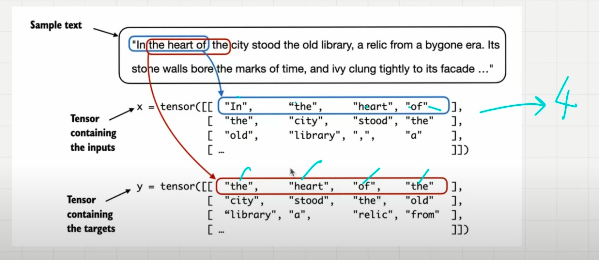

In [34]:
 #the dataloader class consist of four variables
 # text : input traing text
 # tokenizer: BEP tokenizer
 # Max length: lenth of input chunck
 # stride: how much windo should slide to select next input-output chunck

from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self, text, tokenizer, max_length, stride):
    self.input_ids=[]
    self.output_ids=[]

    token_ids = tokenizer.encode(text,allowed_special={"<|endoftext|>"})

    for i in range(0,len(token_ids)-max_length, stride):
      input_chunks = token_ids[i:i+max_length]
      target_chunks = token_ids[i+1:i+max_length+1]

      self.input_ids.append(torch.tensor(input_chunks))
      self.output_ids.append(torch.tensor(target_chunks))
  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self,idx):   #getitem is the class which is used by the dataloader
    return self.input_ids[idx], self.output_ids[idx]


In [35]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True,
                         drop_last=True, num_workers=0):
  tokenizer = tiktoken.get_encoding("gpt2")

  dataset = GPTDatasetV1(text, tokenizer, max_length, stride)
  dataloader = DataLoader(
      dataset,
      batch_size=batch_size,
      shuffle=shuffle,
      drop_last=drop_last,
      num_workers=num_workers
  )

  return dataloader

In [36]:
with open("/content/the-verdict.txt", "r", encoding="utf-8") as f:
  text = f.read()


In [37]:
import torch

print("Pythorch version:", torch.__version__)
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=2, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

seconed_batch = next(data_iter)
print(seconed_batch)

Pythorch version: 2.6.0+cu124
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[2885, 1464, 1807, 3619]]), tensor([[1464, 1807, 3619,  402]])]


In [38]:
!pip uninstall -y numpy
!pip install numpy==1.26.4 --force-reinstall


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


#small demo of vector embedding

In [39]:
#word2vec-google-news
!pip install numpy scipy gensim

import shutil
import os
import gensim.downloader as api

# Path to Gensim's default data directory
data_dir = api.BASE_DIR
model_name = 'word2vec-google-news-300'

# Full path to the model folder
model_path = os.path.join(data_dir, model_name)

# Remove it if it exists
if os.path.exists(model_path):
    shutil.rmtree(model_path)
    print(f"Removed corrupted model directory: {model_path}")
else:
    print("No existing model to remove.")

model = api.load('word2vec-google-news-300')



ModuleNotFoundError: No module named 'gensim'

In [40]:
input_ids = torch.tensor([2,3,5,1])
vocab_size =6
output_dim =3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim) #embeding matrix is similar to NN linear layer
print(embedding_layer.weight)

#NOTE :- we can get embedding materix using torch.nn.linear but is not much compute efficent with scaling

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [41]:
print(embedding_layer(torch.tensor([0]))) #embedding layer is lookup operations to retrive vectors based on IDs

tensor([[ 0.3374, -0.1778, -0.1690]], grad_fn=<EmbeddingBackward0>)


In [42]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [43]:
#positional encoding
vocab_size = 50257
output_dim = 256

token_embedding = torch.nn.Embedding(vocab_size, output_dim)
#position_embedding = torch.nn.Embedding(512, output_dim)

In [44]:
max_length = 4

dataloader = create_dataloader_v1(
    raw_text, batch_size =8, max_length=max_length, stride=max_length, shuffle=False)
data_iter = iter(dataloader)
inputs, target =next(data_iter)

In [45]:
print("Token IDs:\n", inputs)
print("Inputs shape:", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Inputs shape: torch.Size([8, 4])


In [50]:
token_embeddings= token_embedding(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [53]:
context_length =max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [54]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])
